In [36]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# sklean imports 
from sklearn.linear_model import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import *

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import *

In [2]:
# Set colour palette 
'''
greys = ['#767676', '#b3b3b3', '#212121']
sns.set_palette(sns.color_palette(greys))
'''

"\ngreys = ['#767676', '#b3b3b3', '#212121']\nsns.set_palette(sns.color_palette(greys))\n"

In [3]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Data preprocessing

In [4]:
df_raw = pd.read_csv('final_data.csv')
df_raw.head()

,Unnamed: 0,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,id
0,0,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek
1,1,Dance,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,64,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek
2,2,Hip-Hop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek
3,3,Pop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek
4,4,Soul,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,65,0.083,0.724,246333,0.689,...,D,0.304,-5.922,Minor,0.135,146.496,4/4,0.693,2005,2YegxR5As7BeQuVp2U6pek


In [5]:
def data_generation(df, features, sample_size):
    # Data set creation 
    df_temp = df.copy()
    df_temp = df_temp.loc[:, features]

    # Lets take a smaller sample for now 
    df_temp = df_temp.sample(frac = sample_size, random_state = 0)
    y = df_temp['popularity']
    X = df_temp.drop('popularity', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    return([X_train, X_test, y_train, y_test])

In [8]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

X_train, X_test, y_train, y_test = data_generation(df_raw, features, .2)

# Data exploration 

### Which features are popular now 

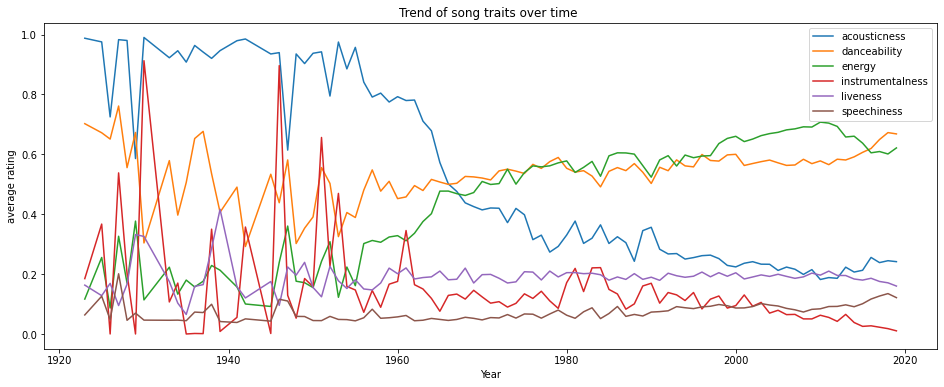

In [9]:
song_traits = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness',
               'speechiness']

#--------------------------------------------------------------------------------------------------
plt.figure(figsize=(16,6))
for trait in song_traits:
    fig = sns.lineplot(data = df_raw, x='year', y=str(trait),
                       ci=None, label=str(trait), estimator='mean')


fig.title.set_text('Trend of song traits over time ')
fig.set(xlabel='Year', ylabel='average rating')

plt.show()

# Data cleaning

- Should probably drop artist name 
- Should probably drop track name 
- Should probably drop track_id


In [33]:
df = df_raw.copy()

# Changing categorical variable mode
df.loc[df["mode"] == 'Major', "mode"] = 1
df.loc[df["mode"] == 'Minor', "mode"] = 0

# Changing categorical variable keys
list_of_keys = df['key'].unique()
for i in range(len(list_of_keys)):
    df.loc[df['key'] == list_of_keys[i], 'key'] = i

# Changing categorical variable time signature
list_of_time_signatures = df['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    df.loc[df['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i

# Changing popularity into binary variable 
df.loc[df['popularity'] < 57, 'popularity'] = 0 
df.loc[df['popularity'] >= 57, 'popularity'] = 1
df.loc[df['popularity'] == 1]
    

df = df.drop('Unnamed: 0', axis=1)
    
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,id
0,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek
1,Dance,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek
2,Hip-Hop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek
3,Pop,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek
4,Soul,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,1,0.083,0.724,246333,0.689,0.0,0,0.304,-5.922,0,0.135,146.496,0,0.693,2005,2YegxR5As7BeQuVp2U6pek


# Data exploration 

In [82]:
features = df.columns.to_list()
features = features[4:]

genre


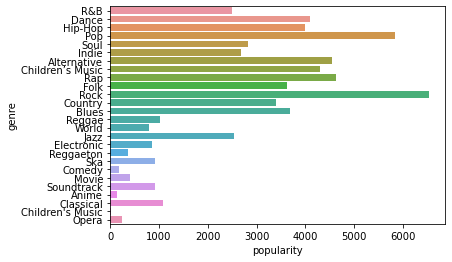

artist_name


KeyboardInterrupt: 

In [74]:
for i in features:
    print(i)
    fig = sns.barplot(data=df, x='popularity', y=i, estimator=lambda x: len(x))
    plt.show()

# Comparing model performance 

In [37]:
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']
results = []
names = []

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features, .2)

#--------------------------------------------------------------------------------------------------
temp = []
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient boosting', GradientBoostingClassifier()))
models.append(('K Neigbor Classifier', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Support Vector Classifier', SVC()))
models.append(('Support Vector Machines', SVC(kernel = 'rbf')))
models.append(('Naive Bayes', GaussianNB()))
models.append(('MLP',  MLPClassifier(alpha=1, max_iter=1000)))



for name, model in models:
    model = Pipeline(steps=[("scaler", StandardScaler()),
                            ("mdl", model)])
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    temp.append([name, cv_results.mean(), cv_results.std()])

mdl_performance = pd.DataFrame(temp, columns=['model', 'score', 'score_std'])
mdl_performance = mdl_performance.sort_values('score', ascending=False)
mdl_performance

,model,score,score_std
1,Random Forest,0.714588,0.007871
2,Gradient boosting,0.660262,0.016574
5,Support Vector Classifier,0.658249,0.010984
6,Support Vector Machines,0.658249,0.010984
8,MLP,0.655030,0.011368
4,Decision Tree,0.650604,0.014482
0,Logistic Regression,0.646781,0.013650
3,K Neigbor Classifier,0.619014,0.013240
7,Naive Bayes,0.602012,0.012591


In [10]:
model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('mdl', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'mdl': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'mdl__C': 1.0,
 'mdl__class_weight': None,
 'mdl__dual': False,
 'mdl__fit_intercept': True,
 'mdl__intercept_scaling': 1,
 'mdl__l1_ratio': None,
 'mdl__max_iter': 100,
 'mdl__multi_class': 'auto',
 'mdl__n_jobs': None,
 'mdl__penalty': 'l2',
 'mdl__random_state': None,
 'mdl__solver': 'lbfgs',
 'mdl__tol': 0.0001,
 'mdl__verbose': 0,
 'mdl__warm_start': False}

# Logistic regression

In [ ]:
# Selection of features 






In [30]:
# Hyper parameter tuning
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

parameters = {
    'mdl__penalty' : ['l1','l2'], 
    'mdl__C'       : np.logspace(-8,8,50),
    'mdl__solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features, .1)

#--------------------------------------------------------------------------------------------------

model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", LogisticRegression())])

grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.958141 using {'mdl__C': 1e-08, 'mdl__penalty': 'l1', 'mdl__solver': 'liblinear'}


The Training Accuracy is:  0.6510060362173038
The Testing Accuracy is:  0.6501006036217304
                 precision    recall  f1-score   support

did not default       0.69      0.63      0.66      2655
        default       0.61      0.67      0.64      2315

       accuracy                           0.65      4970
      macro avg       0.65      0.65      0.65      4970
   weighted avg       0.65      0.65      0.65      4970



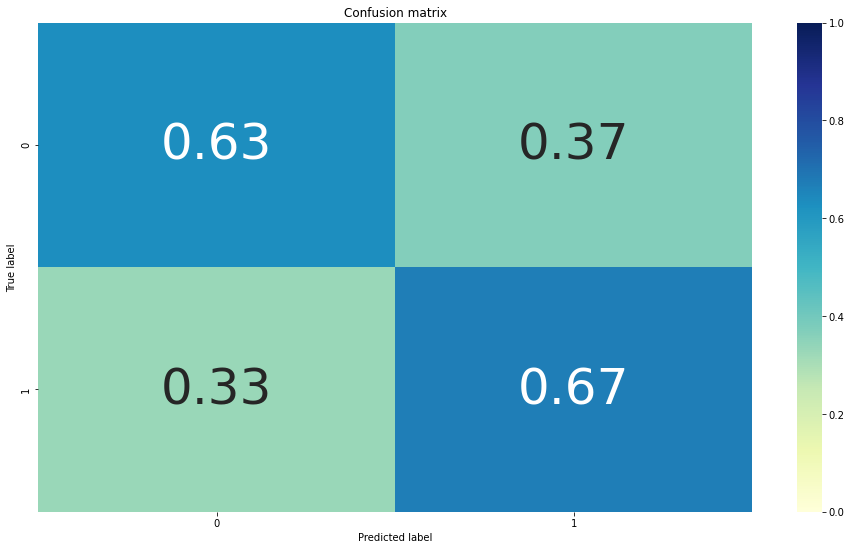

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.492488, G-Mean=0.654


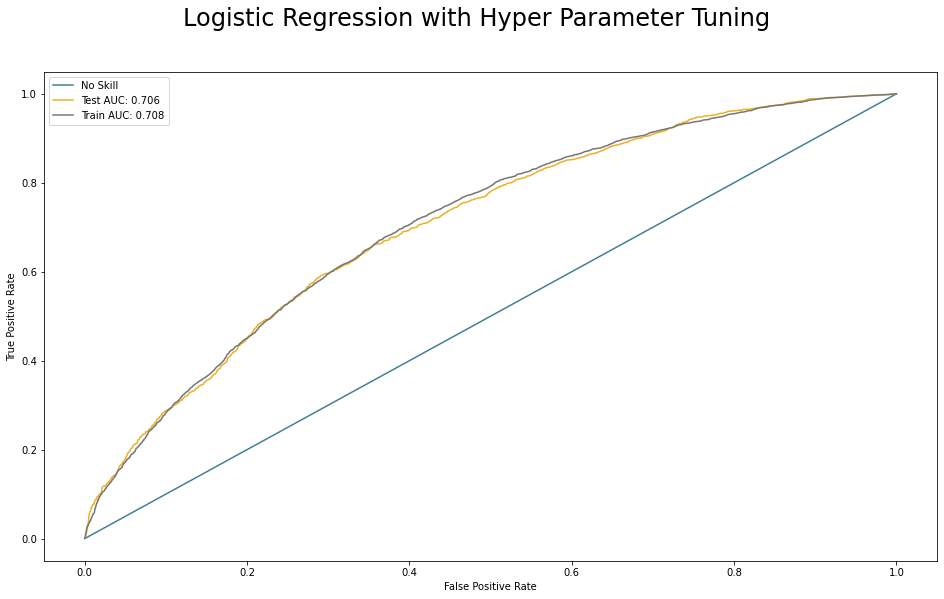

In [34]:
X_train, X_test, y_train, y_test = data_generation(df, features, .4)

#--------------------------------------------------------------------------------------------------
model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", LogisticRegression(max_iter=500, penalty="l2", 
                                                   C=0.0075431200633546075, solver='liblinear'))])

model.fit(X_train, y_train)

#--------------------------------------------------------------------------------------------------
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)

y_pred = (model.predict_proba(X_test)[:,1]>=thresholds[ix]).astype(int)

print("The Training Accuracy is: ", model.score(X_train, y_train))
print("The Testing Accuracy is: ", model.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=['did not default', 'default']))

#--------------------------------------------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

fig = plt.figure(figsize=(16,9))
fig = plot_confusion_matrix(cm_norm, classes = model.classes_, title='Confusion matrix')
plt.savefig('temp.png', transparent=True, dpi=600)
plt.show()

#--------------------------------------------------------------------------------------------------
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

#--------------------------------------------------------------------------------------------------
# Test performance
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Test AUC: {round(auc,3)}', ci=None, color='#edb021')

#--------------------------------------------------------------------------------------------------
# Train performance
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')


gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


#--------------------------------------------------------------------------------------------------
plt.legend()
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('Logistic Regression with Hyper Parameter Tuning', fontsize = 24)
plt.savefig('temp.png', transparent=True)
plt.show()

# Random Forest

In [24]:
# Hyper parameter tuning
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 
            'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
            'speechiness', 'tempo', 'time_signature', 'valence', 'popularity']

parameters = {
    "mdl__n_estimators":[5,10,50,100,250],
    "mdl__max_depth":[2,4,8,16,32,None]
}

#--------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = data_generation(df, features, .1)

#--------------------------------------------------------------------------------------------------

model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", RandomForestClassifier())])

grid_search = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, cv=10,
                           scoring='accuracy',error_score=0)

grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))




Best: 0.688872 using {'mdl__max_depth': 32, 'mdl__n_estimators': 100}


The Training Accuracy is:  0.9912474849094567
The Testing Accuracy is:  0.7818913480885312
                 precision    recall  f1-score   support

did not default       0.83      0.69      0.76      2655
        default       0.71      0.84      0.77      2315

       accuracy                           0.76      4970
      macro avg       0.77      0.77      0.76      4970
   weighted avg       0.77      0.76      0.76      4970



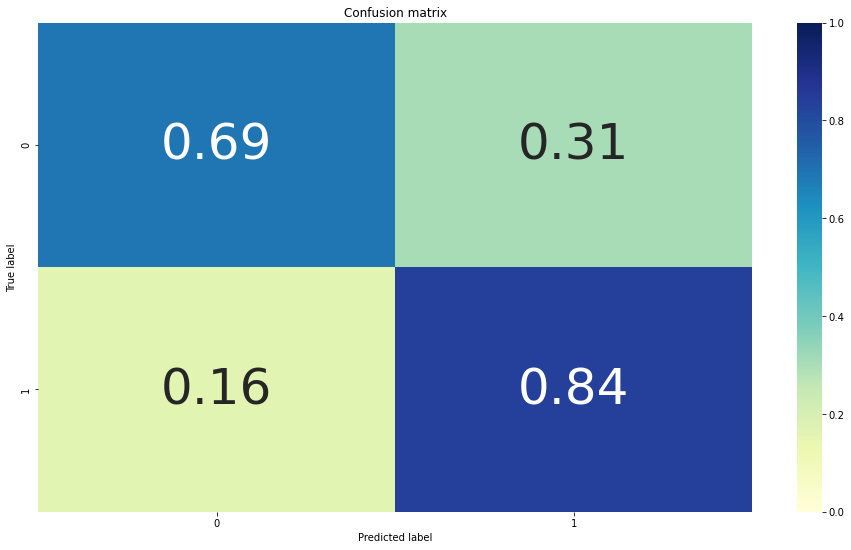

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Best Threshold=0.420833, G-Mean=0.992


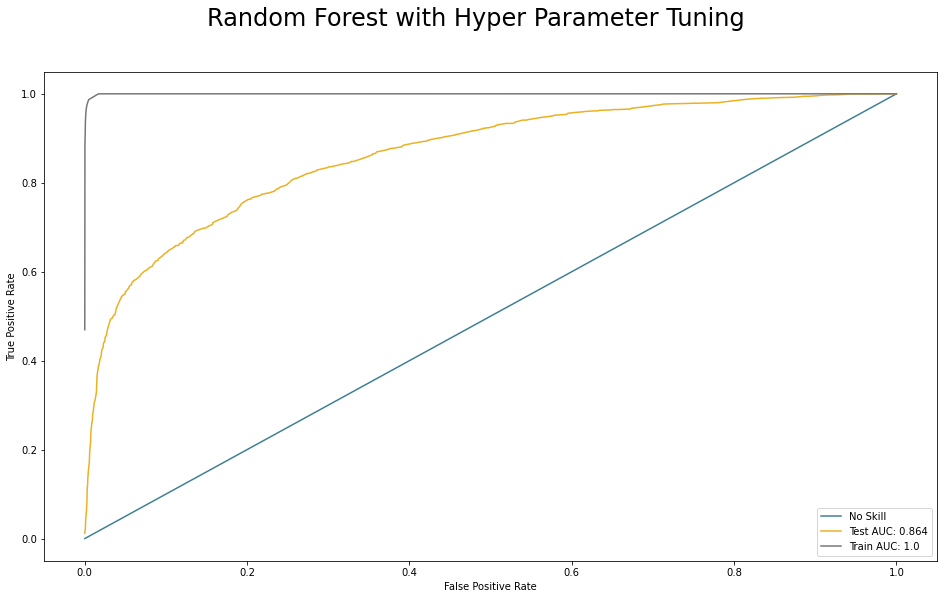

In [35]:
X_train, X_test, y_train, y_test = data_generation(df, features, .4)

#--------------------------------------------------------------------------------------------------
model = model = Pipeline(steps=[("scaler", StandardScaler()),
                        ("mdl", RandomForestClassifier(n_estimators=100,
                                                       max_depth=32))])

model.fit(X_train, y_train)

#--------------------------------------------------------------------------------------------------
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)

y_pred = (model.predict_proba(X_test)[:,1]>=thresholds[ix]).astype(int)

print("The Training Accuracy is: ", model.score(X_train, y_train))
print("The Testing Accuracy is: ", model.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=['did not default', 'default']))

#--------------------------------------------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

fig = plt.figure(figsize=(16,9))
fig = plot_confusion_matrix(cm_norm, classes = model.classes_, title='Confusion matrix')
plt.savefig('temp.png', transparent=True, dpi=600)
plt.show()

#--------------------------------------------------------------------------------------------------
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

#--------------------------------------------------------------------------------------------------
fig = plt.figure(figsize=(16,9))
fig = sns.lineplot([0,1], [0,1], label='No Skill', color='#3f7f93')

#--------------------------------------------------------------------------------------------------
# Test performance
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Test AUC: {round(auc,3)}', ci=None, color='#edb021')

#--------------------------------------------------------------------------------------------------
# Train performance
y_pred = model.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

auc = roc_auc_score(y_train, y_pred)
fig = sns.lineplot(x=fpr, y=tpr, label=f'Train AUC: {round(auc,3)}', ci=None, color='#767676')


gmeans = (tpr * (1-fpr))**.5
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


#--------------------------------------------------------------------------------------------------
plt.legend()
fig.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
plt.suptitle('Random Forest with Hyper Parameter Tuning', fontsize = 24)
plt.savefig('temp.png', transparent=True)
plt.show()